In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib

In [2]:
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']
def assign_buildingtype(name):
    if 'Office' in name:
        return 'Office'
    elif "PrimClass" in name:
        return "PrimClass"
    elif "UnivClass" in name:
        return "UnivClass"
    elif "UnivDorm" in name:
        return "UnivDorm"
    else:
        return "UnivLab"

In [3]:
def assign_traintestSplit(split):
    if split == str([13,1]):
        return '3monthsTrain_1weekTest'
    elif split == str([13,13]):
        return '3monthsTrain_3monthsTest'
    elif split == str([26,1]):
        return '6monthsTrain_1weekTest'
    elif split == str([26,13]):
        return '6monthsTrain_3monthsTest'
    elif split == str([39,1]):
        return '9monthsTrain_1weekTest'
    elif split == str([39,13]):
        return '9monthsTrain_3monthsTest'  

# Visulisation for basic loop

In [4]:
# Read result
basic_result = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/New_scope/Modulated_features_selection_weeks/RandomForestRegressor_metrics_cross_validation_mean_basic.csv') 
basic_result['buildingtype'] = basic_result.buildingName.apply(lambda x: assign_buildingtype(x))
basic_result['Train_testSplit'] = basic_result.trainedtestWeeks_.apply(lambda x: assign_traintestSplit(x))
basic_result.head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,trainedtestWeeks_,buildingtype,Train_testSplit
0,UnivLab_Tracy,22.658703,11.896896,9.403084,13.729858,10.429061,13.623520,"[13, 1]",UnivLab,3monthsTrain_1weekTest
1,UnivLab_Tracy,14.654411,15.048144,10.906178,17.059573,13.060933,14.145848,"[13, 13]",UnivLab,3monthsTrain_3monthsTest
2,UnivLab_Tracy,10.229409,12.287595,10.971142,12.044665,15.476465,12.201855,"[26, 1]",UnivLab,6monthsTrain_1weekTest
3,UnivLab_Tracy,11.276808,13.860368,13.809940,11.997992,10.962498,12.381521,"[26, 13]",UnivLab,6monthsTrain_3monthsTest
4,UnivLab_Tracy,13.248082,14.991281,17.420626,10.999967,9.335870,13.199165,"[39, 1]",UnivLab,9monthsTrain_1weekTest


In [5]:
# Read FE_Filter
FE_Filter = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/New_scope/Modulated_features_selection_weeks/RandomForestRegressor_metrics_cross_validation_mean_FE_Filter.csv') 
FE_Filter['buildingtype'] = FE_Filter.buildingName.apply(lambda x: assign_buildingtype(x))
FE_Filter['Train_testSplit'] = FE_Filter.trainedtestWeeks_.apply(lambda x: assign_traintestSplit(x))

In [6]:
# Read FE_Filter_RF
FE_Filter_RF = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/New_scope/Modulated_features_selection_weeks/RandomForestRegressor_metrics_cross_validation_mean_FE_Filter_RF.csv') 
FE_Filter_RF['buildingtype'] = FE_Filter_RF.buildingName.apply(lambda x: assign_buildingtype(x))
FE_Filter_RF['Train_testSplit'] = FE_Filter_RF.trainedtestWeeks_.apply(lambda x: assign_traintestSplit(x))

Text(0, 0.5, 'Types of building')

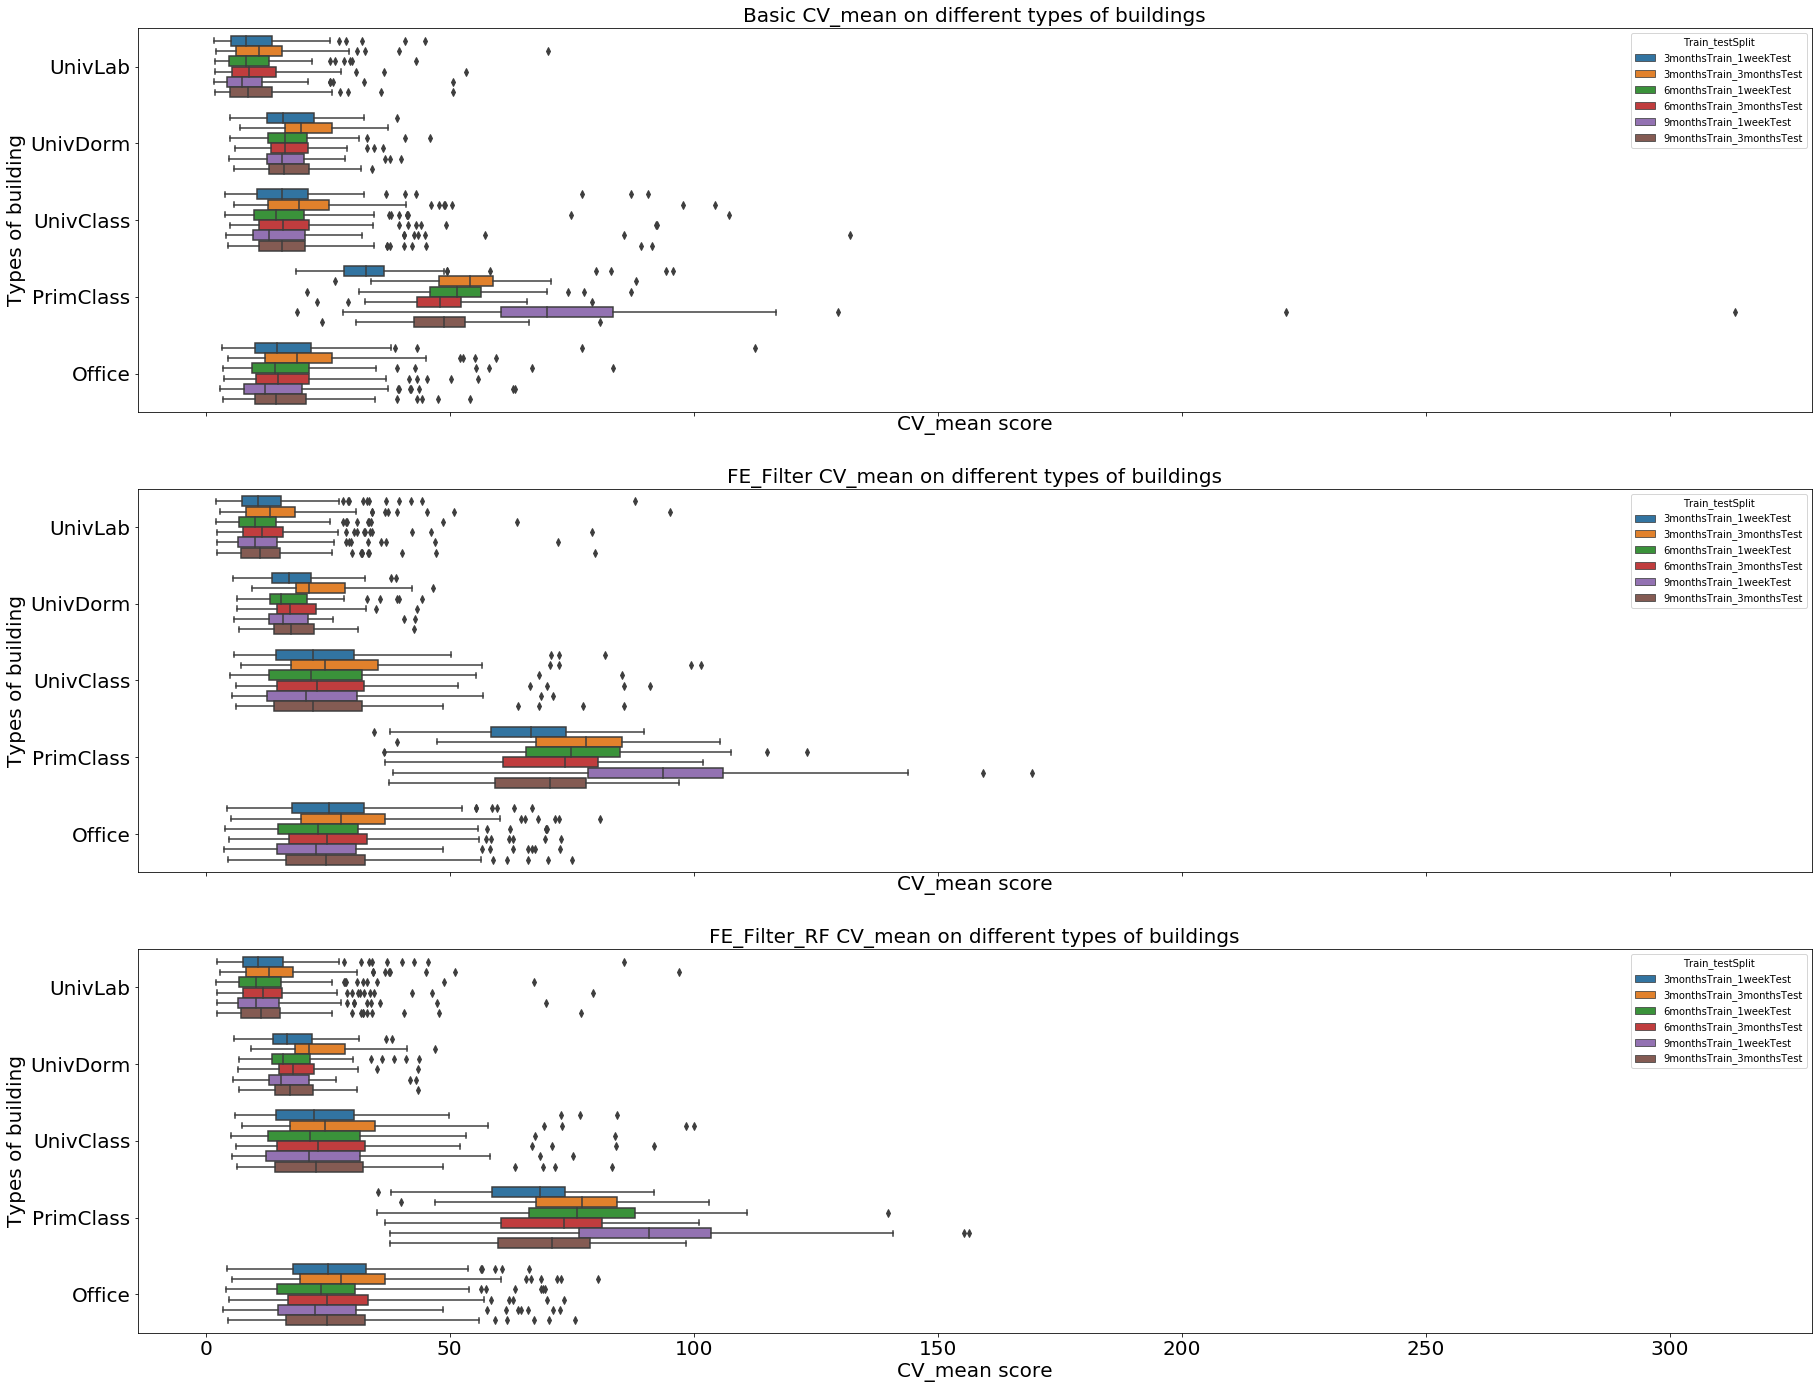

In [9]:
from matplotlib import pyplot
fig, (ax1,ax2,ax3) = pyplot.subplots(figsize=(30,24),nrows=3, sharex=True, sharey=False)
ax1 = sns.boxplot(data=basic_result, 
                  x='CV_mean', y='buildingtype', ax=ax1, hue='Train_testSplit')#, hue='buildingtype')#, ax=axes[buildingtypes.index(types),0])
# ax1 = sns.swarmplot(data=basic_result, 
#                   x='CV_mean', y='buildingtype', ax=ax1, hue='trainedtestWeeks_')# Use swarmplot() to show the datapoints on top of the boxes
ax1.tick_params(labelsize=20)
ax1.axes.set_title("Basic CV_mean on different types of buildings",fontsize=20)
ax1.set_xlabel("CV_mean score",fontsize=20)
ax1.set_ylabel("Types of building",fontsize=20)


ax2 = sns.boxplot(data=FE_Filter, 
                  x='CV_mean', y='buildingtype', ax=ax2, hue='Train_testSplit')#, hue='buildingtype')#, ax=axes[buildingtypes.index(types),0])
# ax2 = sns.swarmplot(data=FE_Filter, 
#                   x='CV_mean', y='buildingtype', ax=ax2, hue='trainedtestWeeks_')# Use swarmplot() to show the datapoints on top of the boxes
ax2.tick_params(labelsize=20)
ax2.axes.set_title("FE_Filter CV_mean on different types of buildings",fontsize=20)
ax2.set_xlabel("CV_mean score",fontsize=20)
ax2.set_ylabel("Types of building",fontsize=20)


ax3 = sns.boxplot(data=FE_Filter_RF, 
                  x='CV_mean', y='buildingtype', ax=ax3, hue='Train_testSplit')#, hue='buildingtype')#, ax=axes[buildingtypes.index(types),0])
# ax3 = sns.swarmplot(data=FE_Filter_RF, 
#                   x='CV_mean', y='buildingtype', ax=ax3, hue='trainedtestWeeks_')# Use swarmplot() to show the datapoints on top of the boxes
ax3.tick_params(labelsize=20)
ax3.axes.set_title("FE_Filter_RF CV_mean on different types of buildings",fontsize=20)
ax3.set_xlabel("CV_mean score",fontsize=20)
ax3.set_ylabel("Types of building",fontsize=20)

# Visulizing the influence of FE+FS on different train test split

In [13]:
basic_result['Method'] = 'Basic'
basic_result.head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,trainedtestWeeks_,buildingtype,Train_testSplit,Method
0,UnivLab_Tracy,22.658703,11.896896,9.403084,13.729858,10.429061,13.623520,"[13, 1]",UnivLab,3monthsTrain_1weekTest,Basic
1,UnivLab_Tracy,14.654411,15.048144,10.906178,17.059573,13.060933,14.145848,"[13, 13]",UnivLab,3monthsTrain_3monthsTest,Basic
2,UnivLab_Tracy,10.229409,12.287595,10.971142,12.044665,15.476465,12.201855,"[26, 1]",UnivLab,6monthsTrain_1weekTest,Basic
3,UnivLab_Tracy,11.276808,13.860368,13.809940,11.997992,10.962498,12.381521,"[26, 13]",UnivLab,6monthsTrain_3monthsTest,Basic
4,UnivLab_Tracy,13.248082,14.991281,17.420626,10.999967,9.335870,13.199165,"[39, 1]",UnivLab,9monthsTrain_1weekTest,Basic


In [14]:
FE_Filter['Method'] = 'FE_Filter'
FE_Filter.head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,trainedtestWeeks_,buildingtype,Train_testSplit,Method
0,UnivLab_Tracy,20.121728,14.834627,10.502255,15.209114,13.016992,14.736943,"[13, 1]",UnivLab,3monthsTrain_1weekTest,FE_Filter
1,UnivLab_Tracy,18.149303,19.173027,15.631504,18.144581,16.075208,17.434725,"[13, 13]",UnivLab,3monthsTrain_3monthsTest,FE_Filter
2,UnivLab_Tracy,14.614221,15.474792,8.408529,19.166369,17.385613,15.009905,"[26, 1]",UnivLab,6monthsTrain_1weekTest,FE_Filter
3,UnivLab_Tracy,16.018407,16.582524,15.887988,15.548624,15.719312,15.951371,"[26, 13]",UnivLab,6monthsTrain_3monthsTest,FE_Filter
4,UnivLab_Tracy,18.617923,16.336638,17.435193,12.523957,14.205515,15.823845,"[39, 1]",UnivLab,9monthsTrain_1weekTest,FE_Filter


In [15]:
FE_Filter_RF['Method'] = 'FE_Filter_RF'
FE_Filter_RF.head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,trainedtestWeeks_,buildingtype,Train_testSplit,Method
0,UnivLab_Tracy,23.360174,14.899553,11.054835,14.059488,12.807261,15.236262,"[13, 1]",UnivLab,3monthsTrain_1weekTest,FE_Filter_RF
1,UnivLab_Tracy,18.261331,19.735390,15.457320,19.188500,15.910413,17.710591,"[13, 13]",UnivLab,3monthsTrain_3monthsTest,FE_Filter_RF
2,UnivLab_Tracy,15.479885,15.782767,8.672728,19.332731,16.743349,15.202292,"[26, 1]",UnivLab,6monthsTrain_1weekTest,FE_Filter_RF
3,UnivLab_Tracy,15.830345,16.610712,16.283129,15.373936,16.274620,16.074548,"[26, 13]",UnivLab,6monthsTrain_3monthsTest,FE_Filter_RF
4,UnivLab_Tracy,18.614183,16.611475,18.421027,12.490872,14.343922,16.096296,"[39, 1]",UnivLab,9monthsTrain_1weekTest,FE_Filter_RF


In [20]:
conc_result = pd.concat([basic_result,FE_Filter,FE_Filter_RF], keys=['basic_result', 'FE_Filter','FE_Filter_RF'])
conc_result

buildingName       CV_1       CV_2       CV_3       CV_4  \
basic_result 0      UnivLab_Tracy  22.658703  11.896896   9.403084  13.729858   
             1      UnivLab_Tracy  14.654411  15.048144  10.906178  17.059573   
             2      UnivLab_Tracy  10.229409  12.287595  10.971142  12.044665   
             3      UnivLab_Tracy  11.276808  13.860368  13.809940  11.997992   
             4      UnivLab_Tracy  13.248082  14.991281  17.420626  10.999967   
             5      UnivLab_Tracy  10.351228  11.678459  10.373321  13.227093   
             6     UnivLab_Tracie   9.019775   5.555606   3.808797   7.686200   
             7     UnivLab_Tracie   8.843560  10.083801   8.173175   9.823596   
             8     UnivLab_Tracie   7.847276   6.881662   4.391171   6.717885   
             9     UnivLab_Tracie   7.674808   7.719292   8.140793   7.949144   
             10    UnivLab_Tracie   7.729496   3.649422   6.076707  14.019349   
             11    UnivLab_Tracie   7.711680   5.614643   7.922090   6.063832   
             12    UnivLab_Terrie   9.667050   4.318910   5.283312   6.761033   
             13    UnivLab_Terrie   9.283280   9.925311   7.310220  11.363528   
             14    UnivLab_Terrie   9.039754   7.588486   4.377139   6.826854   
             15    UnivLab_Terrie   7.162555   7.990897   9.676376   6.756548   
             16    UnivLab_Terrie   8.084504   4.988436   5.697046   6.875463   
             17    UnivLab_Terrie   7.319006   6.736406   7.482474   6.655632   
             18    UnivLab_Taylor  11.207273  20.830531  12.066135   9.479740   
             19    UnivLab_Taylor  13.052768  13.002510  14.231732  15.204199   
             20    UnivLab_Taylor  13.087997  13.652019   3.813979   8.800847   
             21    UnivLab_Taylor  13.034561  11.198287  13.671303  11.570677   
             22    UnivLab_Taylor   8.024085   6.364497   5.068057   9.266267   
             23    UnivLab_Taylor  12.525176  13.771143  10.247224  12.238855   
             24      UnivLab_Tami   9.088261  11.161102  11.272648   6.785193   
             25      UnivLab_Tami  10.586759  10.318442  12.252488  12.580580   
             26      UnivLab_Tami   7.278981  10.935483   5.704422  10.170191   
             27      UnivLab_Tami   9.938870   8.585787   8.716507   8.417965   
             28      UnivLab_Tami  11.028550   7.557053   7.007532   5.526992   
             29      UnivLab_Tami   8.596171   8.451707   6.732316   9.100095   
...                           ...        ...        ...        ...        ...   
FE_Filter_RF 2856   Office_Aliyah   9.228277  10.448954   6.377496   8.659365   
             2857   Office_Aliyah   7.951238   8.550700   9.863349  11.216953   
             2858   Office_Aliyah   5.343141   8.888260   5.077889   5.590710   
             2859   Office_Aliyah   7.231350   7.785560   7.216836   7.770775   
             2860   Office_Aliyah   5.271172   7.725503   6.285757   8.420132   
             2861   Office_Aliyah   7.842560   7.229366   6.884679   7.732062   
             2862  Office_Alannah  26.862791  27.551349  29.043346  28.941463   
             2863  Office_Alannah  33.402553  32.438388  34.105124  36.241832   
             2864  Office_Alannah  28.708887  23.443616  27.433938  36.579487   
             2865  Office_Alannah  30.867070  35.769629  31.408034  29.411142   
             2866  Office_Alannah  30.049702  38.845933  25.187571  39.211854   
             2867  Office_Alannah  28.869520  29.840320  32.960009  33.966883   
             2868       Office_Al  22.015103  31.348936  24.316889  21.750798   
             2869       Office_Al  23.765123  22.120450  25.140806  28.492038   
             2870       Office_Al  18.698052  24.289475  18.922934  18.392083   
             2871       Office_Al  22.104124  24.201642  22.280521  21.487443   
             2872       Office_Al  16.787573  24.975363  21.190087  16.760443   
             2873       Office_Al  21.014982  22.595

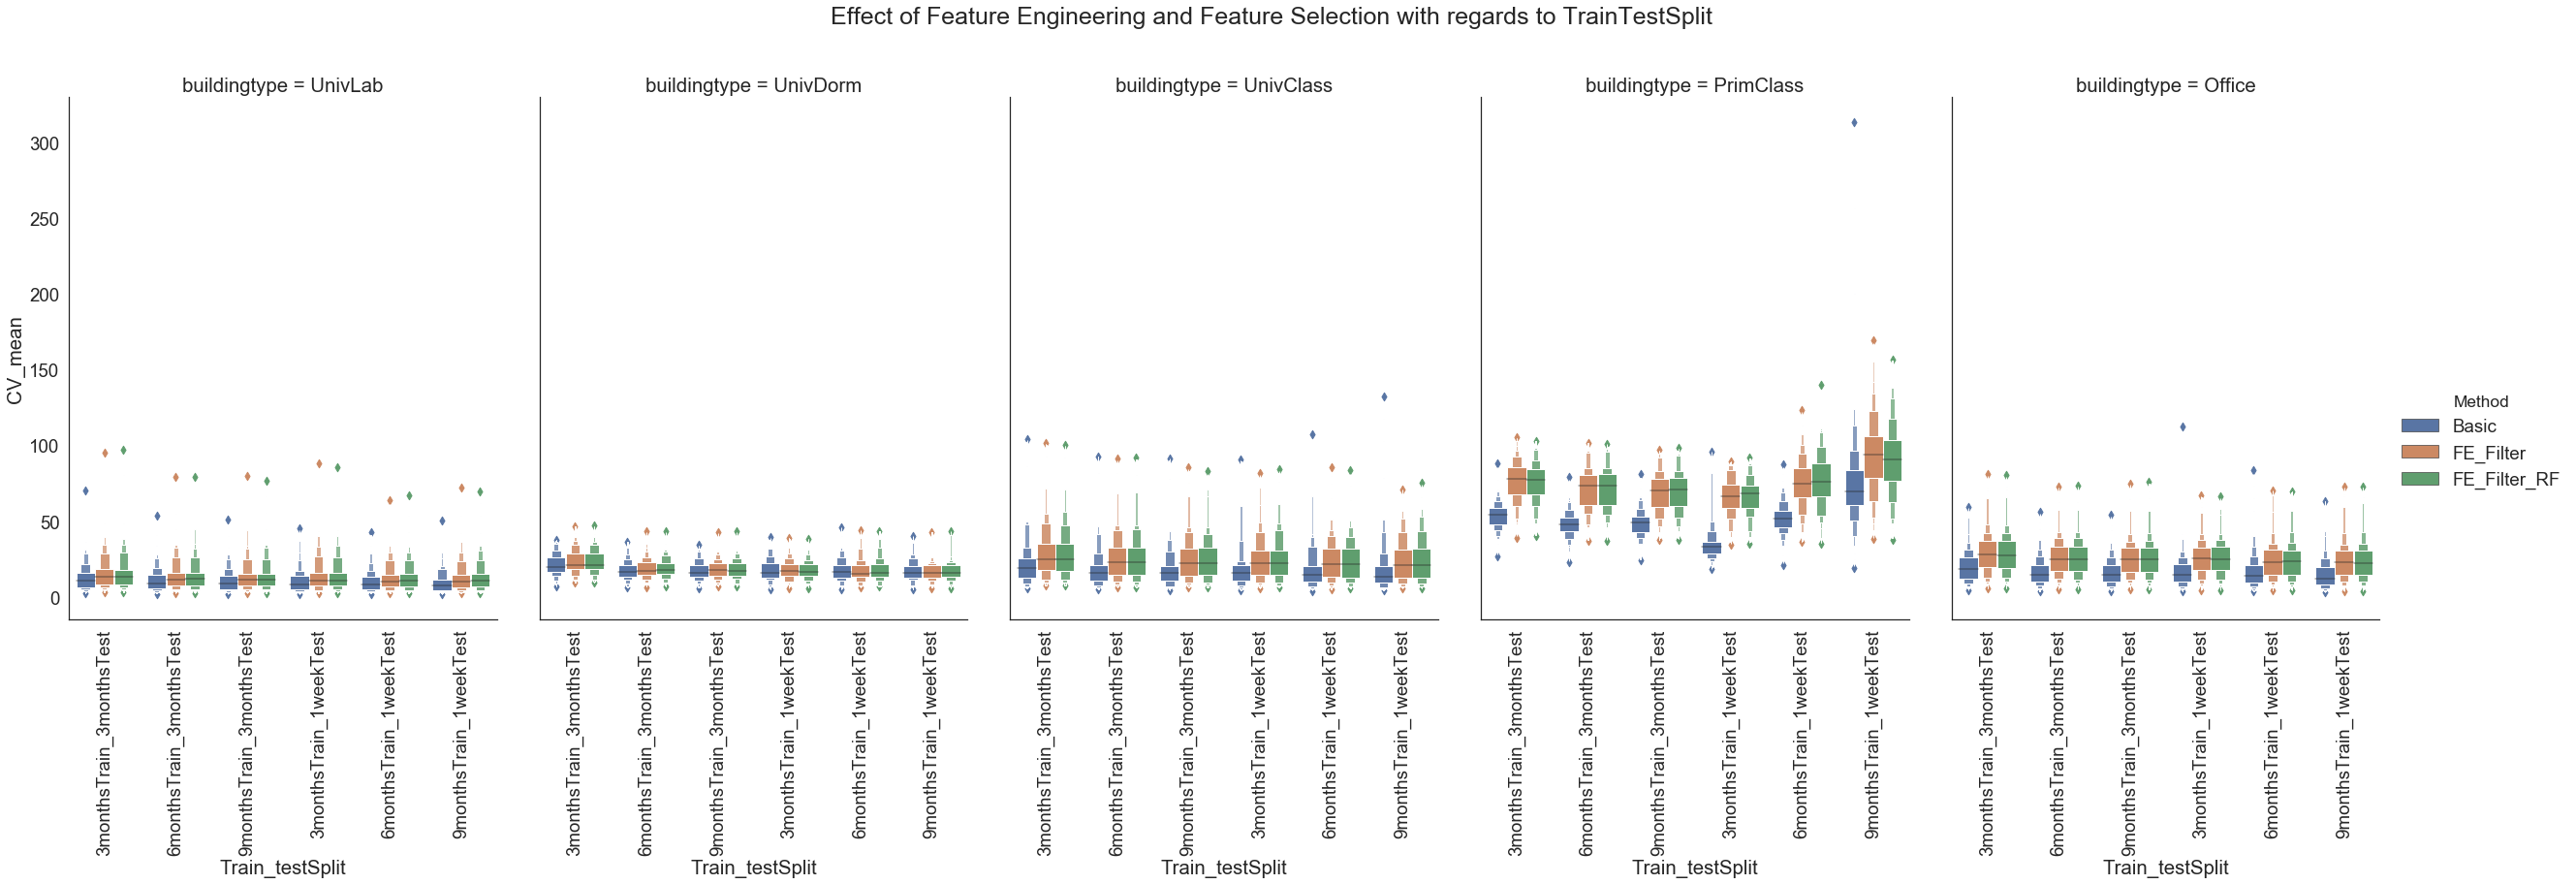

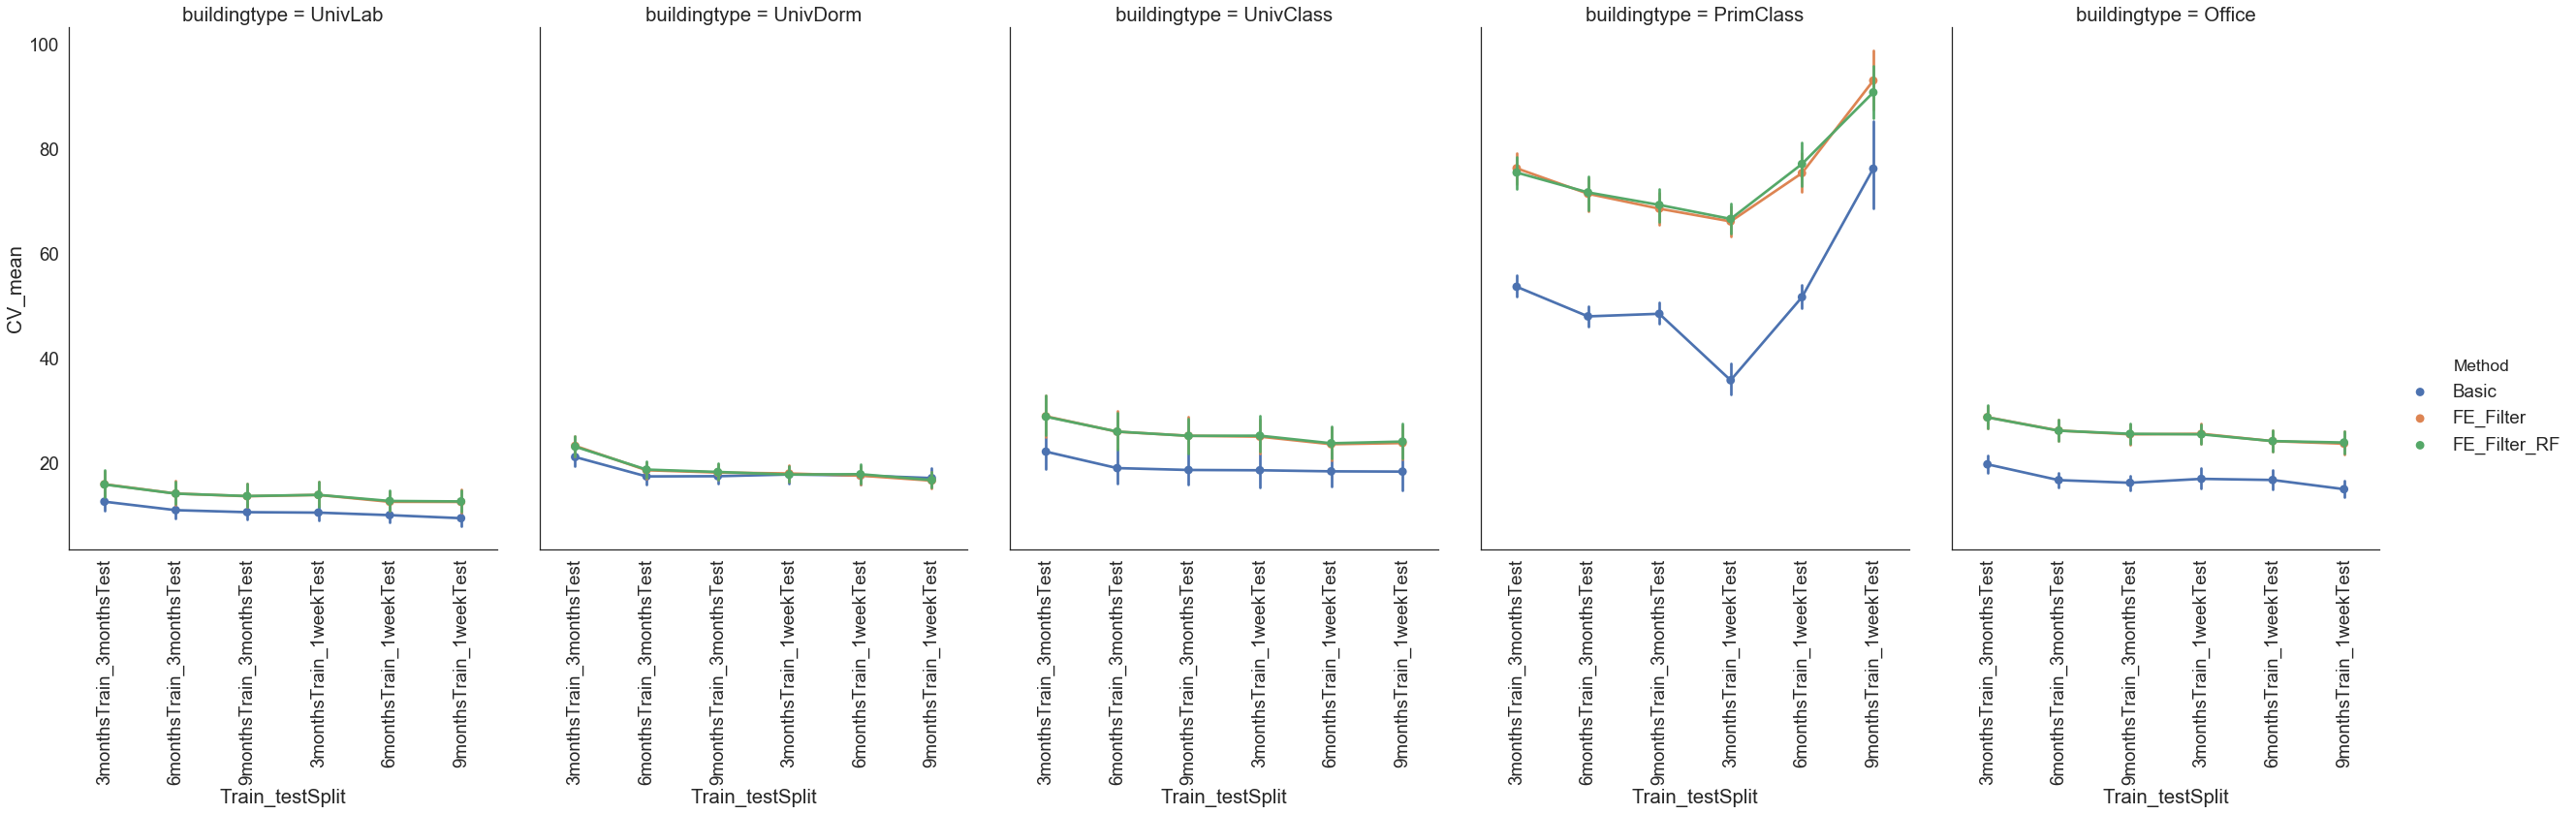

In [120]:
sns.set(font_scale=1.7,style='white')
g = sns.catplot(x="Train_testSplit",order=['3monthsTrain_3monthsTest', '6monthsTrain_3monthsTest','9monthsTrain_3monthsTest',
                                           '3monthsTrain_1weekTest','6monthsTrain_1weekTest','9monthsTrain_1weekTest'], y="CV_mean",
                hue="Method", col="buildingtype",
                data=conc_result, kind="boxen"
                ,height=10, aspect=0.7,col_wrap=5)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.85, wspace=0.1)
g.fig.suptitle('Effect of Feature Engineering and Feature Selection with regards to TrainTestSplit', fontsize=25)

h = sns.catplot(x="Train_testSplit",order=['3monthsTrain_3monthsTest', '6monthsTrain_3monthsTest','9monthsTrain_3monthsTest',
                                           '3monthsTrain_1weekTest','6monthsTrain_1weekTest','9monthsTrain_1weekTest'], y="CV_mean",
                hue="Method", col="buildingtype",
                data=conc_result, kind="point"
                ,height=10, aspect=0.7,col_wrap=5)
h.set_xticklabels(rotation=90)
h.fig.subplots_adjust(top=0.85, wspace=0.1)